In [10]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import Image

<center><font size="+3">Machine Learning - Neural Networks - Deep Learning</font></center>

https://www.techemergence.com/what-is-machine-learning/


-    “Machine Learning at its most basic is the practice of using algorithms to parse data, learn from it, and then make a determination or prediction about something in the world.” – Nvidia 
-    <span style="color:blue">“Machine learning is the science of getting computers to act without being explicitly programmed.” – Stanford</span>
-    <span style="color:blue">“Machine learning is based on algorithms that can learn from data without relying on rules-based programming.”- McKinsey & Co.</span>
-    “Machine learning algorithms can figure out how to perform important tasks by generalizing from examples.” – University of Washington
-    “The field of Machine Learning seeks to answer the question “How can we build computer systems that automatically improve with experience, and what are the fundamental laws that govern all learning processes?” – Carnegie Mellon University


<p style="text-align:center;"><img src = "images/AIlandscape.png" width=1024></p>


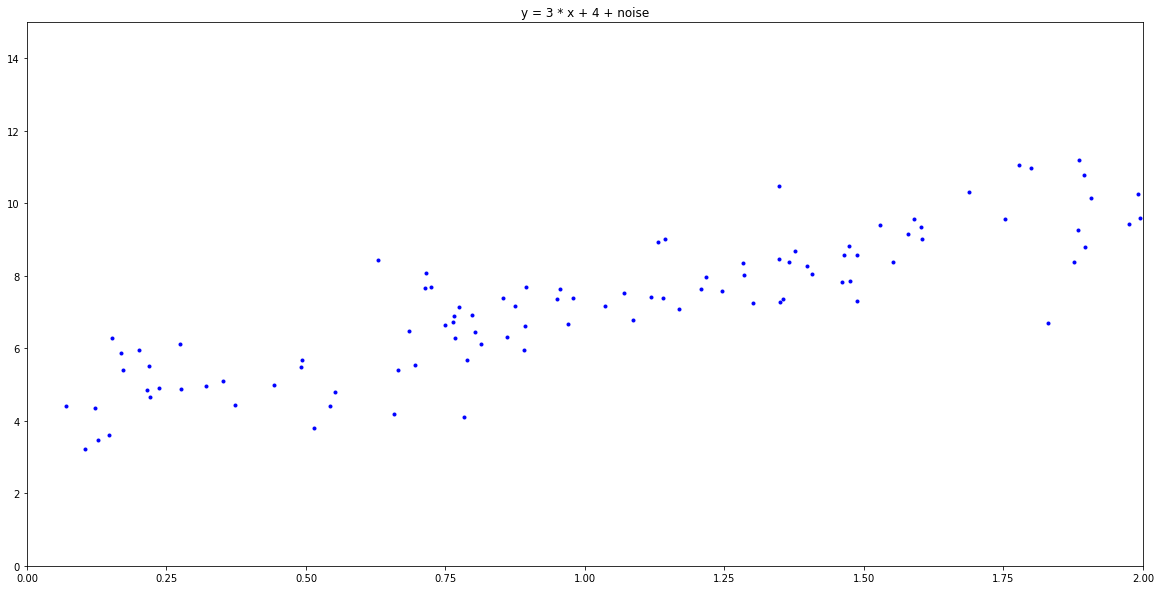

In [18]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import Image


plt.rcParams["figure.figsize"] = (20,10)

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)
X_b = np.c_[np.ones((100 ,1)), X]

plt.title('y = 3 * x + 4 + noise')
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()

In [11]:
#Calculate Normal Equation
theta_norm = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(str(theta_norm))

#Make predictions
X_new_norm = np.array([[0], [2]])
X_new_norm_b = np.c_[np.ones((2,1)), X_new_norm]
y_pred_norm = X_new_norm_b.dot(theta_norm)

plt.title('Normal Equation')
plt.plot(X,y,"b.")
plt.plot(X_new_norm, y_pred_norm, "r-")
plt.axis([0,2,0,15])
plt.show()

NameError: name 'X_b' is not defined

<center><font size="+3">Linear Regression:</font></center></br>
- Probeer een rechte lijn te vinden die het "beste" past, dus het minste afwijkt ("lowest costs"). 
- "Cost"-functie is MSE (Mean Square Error) : MSE(X, h<sub>&theta;</sub>) = $\frac{1}{m}\displaystyle\sum_{i=1}^{m}$(&theta;<sup>T</sup> $\cdot$  x<sup>(i)</sup> - y<sup>(i)</sup>)<sup>2</sup>
- Cost functie is een convex functie, dus &#233;&#233;n minimum!
- Exact te berekenen via de "Normaal Vergelijkingen"
- &theta; = (X<sup>T</sup> * X)<sup>-1</sup> * X<sup>T</sup> * y
- Matrix inversie van een n x n matrix is een "dure" operatie: 2*n<sup>3</sup>/3 operaties.

![Cost/Error](images/regression-error.jpg?raw=true)

![Simple Neuron](images/simple-neuron.jpg?raw=true)

<center><font size="+3">Gradient Descent</font></center></br>
- Gebruik afgeleide van de cost functie om het minimum van de cost-functie te vinden
- MSE is convex, dus geen meogelijkheid om te blijven hangen in lokale minima
- Is veelal "goedkoper" dan Normaal Vergelijkingen.
- Belangrijke parameter is de "step size" 
- MSE Cost functie: MSE(X, h<sub>&theta;</sub>) = $\frac{1}{m}\displaystyle\sum_{i=1}^{m}$(&theta;<sup>T</sup> $\cdot$  x<sup>(i)</sup> - y<sup>(i)</sup>)<sup>2</sup>
- Afgeleide van de Cost functie: $\frac{\partial Cost}{\partial \theta_{j}}$ = $\frac{2}{m}\displaystyle\sum_{i=1}^{m}$(&theta;<sup>T</sup> $\cdot$  x<sup>(i)</sup> - y<sup>(i)</sup>) $\cdot$ x<sub>j</sub><sup>(i)</sup>
- &theta;<sub>new</sub> = &theta;<sub>old</sub> - &alpha; * $\frac{\partial Cost}{\partial \theta_{j}}$
- Dit is de basis van Machine Learning en Deep Learning. Verbeterde versies hiervan zijn o.a. RMSProp en ADAM


![Gradient Descent](images/ball.png?raw=true)
<font size="+2">&theta;<sub>new</sub> = &theta;<sub>old</sub> - &alpha; * dCost/d&theta;</font>


![Learning rate](images/learning-rate.jpg?raw=true)
<font size="+2">&theta;<sub>new</sub> = &theta;<sub>old</sub> - &alpha; * dCost/d&theta;</font>


[[ 4.27243321]
 [ 2.87685392]]


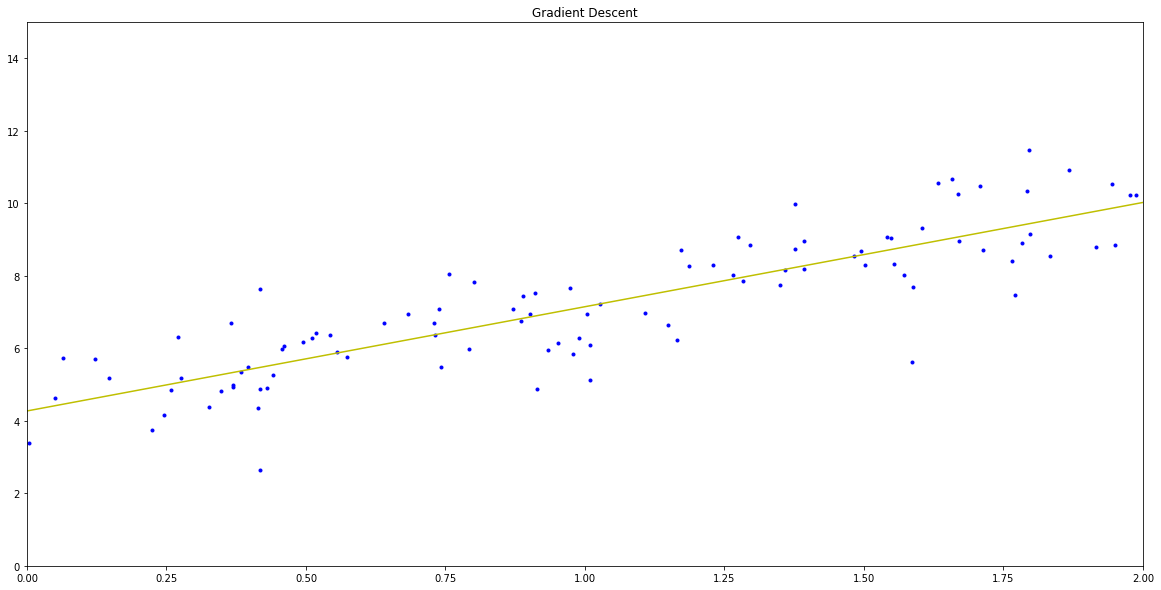

In [9]:
# Do a gradient descent
eta =0.1
n_iterations = 1000
m = 100

theta_grad = np.random.rand(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta_grad) - y)
    theta_grad = theta_grad - eta * gradients
    
print(str(theta_grad))    
# Make prediction     
X_new_grad = np.array([[0], [2]])
X_new_grad_b = np.c_[np.ones((2,1)), X_new_grad]
y_pred_grad = X_new_grad_b.dot(theta_grad)


plt.title('Gradient Descent')
plt.plot(X,y,"b.")
plt.plot(X_new_grad, y_pred_grad, "y-")
plt.axis([0,2,0,15])
plt.show()


<center><font size="+3">Batch Gradient Descent:</font></center></br>
    - Voor een optimalisatieslag (epoch) worden alles samples meegerekend. Dit is dus processor intensief.
    - Stochastic Gradient Descent: neem random samples
    - Mini batch Gradient Descent: neem een klein deel van de samples en voer een optimalisatie uit.
   


<center><font size="+3">Polynomial Regression:</font></center></br>
    - Voeg machten van features toe als nieuwe features
    - Train als een lineair model via Linear Regression
    - Op deze manier zijn zeer complexe functies mogelijk
   

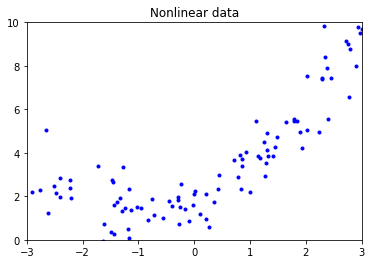

In [15]:
m = 100
X_poly = 6 * np.random.rand(m , 1) - 3
y_poly = 0.5 * X_poly ** 2 + X_poly + 2 + np.random.randn(m, 1)

plt.title('Nonlinear data')
plt.plot(X_poly,y_poly,"b.")
plt.axis([-3,3,0,10])
plt.show()


In [16]:
from sklearn.preprocessing import PolynomialFeatures
# Create extra features
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_extra_feat = poly_features.fit_transform(X_poly)
print("X_poly[0] = " + str(X_poly[0]))
print("X_extra_feat[0] = " + str(X_extra_feat[0]))



X_poly[0] = [ 2.31731688]
X_extra_feat[0] = [ 2.31731688  5.3699575 ]


In [17]:
from sklearn.linear_model import LinearRegression
# Fit the model
lin_reg = LinearRegression()
lin_reg.fit(X_extra_feat, y_poly)
lin_reg.intercept_, lin_reg.coef_

(array([ 1.81718959]), array([[ 1.0677005 ,  0.51497974]]))

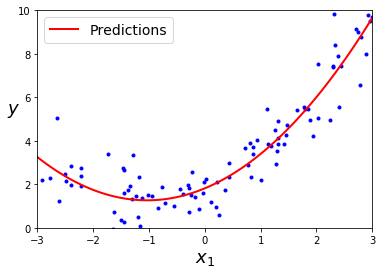

In [18]:
# Create a test set and show results
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X_poly, y_poly, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

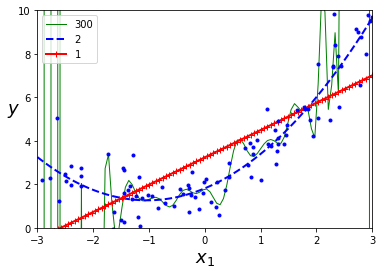

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X_poly, y_poly)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)


plt.plot(X_poly, y_poly, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

<center><font size="+3">Over and Under fitting</font></center></br>
- Performance testen op trainingsset geeft lage fout maar testen op testset geeft hoge fout -> Over fitting (high variance) -> Regularization, Dropout
- Performance testen op trainingsset en testen op testset geeft hoge fout -> Under fitting (high bias) -> meer data, model complexer maken (hogere polynomen)

 

<center><font size="+3">Logistic  Regression:</font></center></br>
- I.p.v directe uitvoer van waarde, deze door de "logistic"-functie halen (sigmoid-functie)
- Op deze manier wordt een binaire classificator gemaakt
- Geeft kans dat instantie tot een klasse behoort ( p > 0.5 )
- Aangepaste cost-functie en afgeleide hiervan
    
![Sigmoid function](images/sigmoid.gif?raw=true)
<br><hr><br>
<center><font size="+3">Softmax Regression:</font></center></br>
- Softmax is een generalisatie van een aantal Logistic Regression units.
- "One versus all"-classificatie  
- Aangepaste cost-functie en afgeleide hiervan

![Sigmoid function](images/softmax.png?raw=true)



Image Data Shape (1797, 64)
Label Data Shape (1797,)


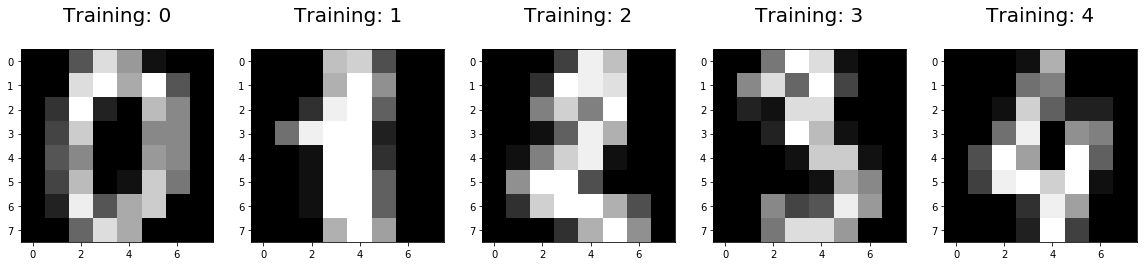

In [18]:


from sklearn.datasets import load_digits
digits = load_digits()

# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
#print(“Image Data Shape” , digits.data.shape)
print("Image Data Shape", digits.data.shape)

# Print to show there are 1797 labels (integers from 0–9)
print("Label Data Shape", digits.target.shape)

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)
    
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)


In [20]:
from sklearn.linear_model import LogisticRegression
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)
#predictions = logisticRegr.predict(x_test)
# Use score method to get accuracy of model
score = logisticRegr.score(x_test, y_test)
print(score)
    

0.953333333333


<center><font size="+3">Neural Networks</font></center></br>

![Neural network](images/neural-network.png?raw=true)


<center><font size="+3">Neural Networks</font></center></br>

- Backpropagation (kettingregel!!)
- Iedere unit bevat sigmoid functie
- Kan complexe functies realiseren 
- Kan niet diep zijn vanwege "vanishing gradients" (signoid verzadigd)

In [2]:
from IPython.display import HTML

HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/ilP4aPDTBPE" frameborder="0" allow="autoplay; encrypted-media" allowfullscreen></iframe>')

![Biological neuron](images/biological-neuron.jpg?raw=true)

[Andrew Ng] A single neuron in the brain is an incredibly complex machine that even today we don’t understand. A single “neuron” in a neural network is an incredibly simple mathematical function that captures a minuscule fraction of the complexity of a biological neuron. So to say neural networks mimic the brain, that is true at the level of loose inspiration, but really artificial neural networks are nothing like what the biological brain does.

<center><font size="+3">Deep Neural Networks</font></center></br>
- Er is veel meer data aanwezig (Big Data)
- Toemane van computercapaciteit is enorm gegroeid (met dank aan de game insdustrie)
- Training algoritms zijn verbeterd. KLeine wijzigingen, grote impact
- Sommige theoretisch beperkingen van neurale netwerken bleken in de praktijk erg mee te vallen. Denk aan globale en locale optima in costs-functies

Hierdoor zijn er nu neurale netwerken mogelijk met 100-200 hidden layers met iedere layer honderden neurons!

![Biological neuron](images/deep-neural-network.jpg?raw=true)

<center><font size="+3">Convolutional Neural Networks</font></center></br>
<br>
- Minder gewichten (sparse connections)
- Convolutie
- "Super human performance in complex visual tasks"
- Afgeleid van de visueele cortex van menselijk brein
- Applicaties: self driven cars, afbeelding zoek services, Natural language processing, spraakherkenning, etc.
- Modellen zijn vaak complex en het duurt lang om te trainen, daarom <b>Transfer Learning</b>



![Biological neuron](images/conv1.png?raw=true)


![Biological neuron](images/Convolution_schematic.gif?raw=true)
![Biological neuron](images/max_pool1.png?raw=true)

![Biological neuron](images/conv2.png?raw=true?height="200%")

![Biological neuron](images/conv3.jpg?raw=true)

<center><font size="+3">Recursive Neural Networks</font></center></br>
- Alle tot nu besproken netwerken zijn feed-forward. RNN maken gebruik van een terugkoppeling.
- Kan overweg met sequentiele data (text, audio)
- Toepassingen zijn woord-voorspelling, time series prediction (bitcoins!!), muziekgeneratie, vertaling, speect to text, etc...


![Biological neuron](images/rnn.jpg?raw=true)

![Biological neuron](images/rnn-1.png?raw=true)
![Biological neuron](images/rnn-3.png?raw=true)

<center><font size="+3">Resources</font></center></br>
- Tool : Scikit-Learn (gratis)
- Tool : Tensorflow (gratis)
- Tool : Keras (gratis)
- Cursus : Coursera : Machine Learning (5 mnd, \$40/mnd)
- Cursus : Coursera : Deep Learning (deeplearning.ai) (5 mnd, \$40/mnd)
- Boek : Geron : Hands On Machine Learning with Skikit-Learn & Tensorflow
- Boek : Gulli, Pal : Deep Learning with Keras